In [1]:
import os 
os.chdir("../")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt
import reptrvae
import seaborn as sns
from scipy import stats
import matplotlib
import scipy.sparse as sparse
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

Using TensorFlow backend.


In [3]:
path_to_save = "./results/New_Figure/"
os.makedirs(path_to_save, exist_ok=True)
sc.settings.figdir = path_to_save

In [4]:
kang = sc.read("/home/mohsen/data/kang/kang_normalized.h5ad")
kang

AnnData object with n_obs × n_vars = 13576 × 2000 
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [5]:
kang_cell_types = kang.obs['cell_type'].unique().tolist()

In [6]:
def get_results(reconstructed_adata):
    recon_adata = None
    for cell_type in kang_cell_types:
        cell_type_adata = kang[kang.obs['cell_type'] == cell_type]
        cell_type_adata.obs['cond'] = f"{cell_type}_real_"
        cell_type_adata.obs['cond'] = cell_type_adata.obs[['cond', 'condition']].agg(''.join, axis=1)
        
        pred_stim_adata = reconstructed_adata[reconstructed_adata.obs['condition'] == f"{cell_type}_pred_stimulated"]
        pred_stim_adata.obs['cond'] = f'{cell_type}_pred_stimulated'
        pred_stim_adata.obs['cell_type'] = cell_type
        
        recon_adata = pred_stim_adata.concatenate(cell_type_adata) if recon_adata is None else pred_stim_adata.concatenate(cell_type_adata, recon_adata)
    return recon_adata

## trVAE 

In [29]:
trvae_reconstructed = None
counter = 0
for cell_type in kang_cell_types:
    reconstructed_adata = sc.read(f"/home/mohsen/data/trvae/reconstructed/trVAE_kang/{cell_type}.h5ad")
    reconstructed_adata.obs['condition'] = f'{cell_type}_pred_stimulated'
    if trvae_reconstructed is None:
        trvae_reconstructed = reconstructed_adata.copy()
    else:
        trvae_reconstructed = trvae_reconstructed.concatenate(reconstructed_adata)
trvae_reconstructed = get_results(trvae_reconstructed)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


## scVI

In [8]:
scvi_reconstructed = None
for cell_type in kang_cell_types:
    cell_type_reconstructed = sc.read(f"/home/mohsen/data/trvae/reconstructed/kang/scVI-{cell_type}.h5ad")
    if scvi_reconstructed is None:
        scvi_reconstructed = cell_type_reconstructed.copy()
    else:
        scvi_reconstructed = scvi_reconstructed.concatenate(cell_type_reconstructed)
scvi_reconstructed = get_results(scvi_reconstructed)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


## MMD-CVAE

In [9]:
mmdcvae_reconstructed = None
for cell_type in kang_cell_types:
    cell_type_reconstructed = sc.read(f"/home/mohsen/data/trvae/reconstructed/kang/MMDCVAE-{cell_type}.h5ad")
    if mmdcvae_reconstructed is None:
        mmdcvae_reconstructed = cell_type_reconstructed.copy()
    else:
        mmdcvae_reconstructed = mmdcvae_reconstructed.concatenate(cell_type_reconstructed)
mmdcvae_reconstructed = get_results(mmdcvae_reconstructed)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


## SAUCIE

In [10]:
saucie_reconstructed = None
for cell_type in kang_cell_types:
    cell_type_reconstructed = sc.read(f"/home/mohsen/data/trvae/reconstructed/kang/SAUCIE-{cell_type}.h5ad")
    if saucie_reconstructed is None:
        saucie_reconstructed = cell_type_reconstructed.copy()
    else:
        saucie_reconstructed = saucie_reconstructed.concatenate(cell_type_reconstructed)
saucie_reconstructed = get_results(saucie_reconstructed)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


## CVAE

In [11]:
cvae_reconstructed = None
for cell_type in kang_cell_types:
    cell_type_reconstructed = sc.read(f"/home/mohsen/data/trvae/reconstructed/kang/CVAE-{cell_type}.h5ad")
    if cvae_reconstructed is None:
        cvae_reconstructed = cell_type_reconstructed.copy()
    else:
        cvae_reconstructed = cvae_reconstructed.concatenate(cell_type_reconstructed)
cvae_reconstructed = get_results(cvae_reconstructed)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


## CycleGAN

In [12]:
cyclegan_reconstructed = None
for cell_type in kang_cell_types:
    cell_type_reconstructed = sc.read(f"/home/mohsen/data/trvae/reconstructed/kang/CycleGAN-{cell_type}.h5ad")
    if cyclegan_reconstructed is None:
        cyclegan_reconstructed = cell_type_reconstructed.copy()
    else:
        cyclegan_reconstructed = cyclegan_reconstructed.concatenate(cell_type_reconstructed)
cyclegan_reconstructed = get_results(cyclegan_reconstructed)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


## scGen

In [13]:
scgen_reconstructed = sc.read("/home/mohsen/data/trvae/reconstructed/kang/scGen-None.h5ad")
scgen_reconstructed = get_results(scgen_reconstructed)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [14]:
def score(adata, data_name, 
          n_deg=10, n_genes=1000, 
          condition_key="condition", cell_type_key="cell_type",
          conditions={"stim": "stimulated", "ctrl": "control"},
          sortby="median_score"):
    import scanpy as sc
    import numpy as np
    from scipy.stats import entropy
    import pandas as pd
    
    sc.tl.rank_genes_groups(adata, groupby=condition_key, method="wilcoxon", n_genes=n_genes)
    gene_names = adata.uns["rank_genes_groups"]['names'][conditions['stim']]
    gene_lfcs = adata.uns["rank_genes_groups"]['logfoldchanges'][conditions['stim']]
    diff_genes_df = pd.DataFrame({"names": gene_names, "lfc": gene_lfcs})
    diff_genes = diff_genes_df["names"].tolist()[:n_genes]
    print(len(diff_genes))

    adata_deg = adata[:, diff_genes].copy()
    cell_types = adata_deg.obs[cell_type_key].unique().tolist()
    lfc_temp = np.zeros((len(cell_types), n_genes))
    for j, ct in enumerate(cell_types):
        stim = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                         (adata_deg.obs[condition_key] == conditions["stim"])].X.mean(0)
        ctrl = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                         (adata_deg.obs[condition_key] == conditions["ctrl"])].X.mean(0)

        lfc_temp[j] = np.abs((stim - ctrl)[None, :])
    norm_lfc = lfc_temp / lfc_temp.sum(0).reshape((1, n_genes))
    ent_scores = entropy(norm_lfc)
    median = np.median(lfc_temp, axis=0)
    med_scores = np.max(np.abs((lfc_temp - median)), axis=0)
    df_score = pd.DataFrame({"genes": adata_deg.var_names.tolist(), "median_score": med_scores,
                             "entropy_score": ent_scores})
    if sortby == "median_score":
        return df_score.sort_values(by=['median_score'], ascending=False).iloc[:n_deg, :]
    else:
        return df_score.sort_values(by=['entropy_score'], ascending=False).iloc[:n_deg, :]

In [15]:
def plot_boxplot(recon_data, 
                 method, 
                 data_name="kang", 
                 n_genes=100, 
                 n_bins=10,
                 restore=True, 
                 score_type="median_score", 
                 y_measure="SE",
                 scale="log"):
    if data_name == "kang":
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        train = sc.read("/home/mohsen/data/kang/kang_normalized.h5ad")
    elif data_name.startswith("haber"):
        stim_key = data_name.split("_")[-1]
        ctrl_key = "Control"
        cell_type_key = "cell_label"
        train = sc.read("/home/mohsen/data/haber/haber_normalized.h5ad")
    
    import matplotlib
    matplotlib.rc('ytick', labelsize=14)
    matplotlib.rc('xtick', labelsize=14)
    conditions = {"ctrl": ctrl_key, "stim": stim_key}

    sc.settings.figdir = path_to_save

    diff_genes = score(train, data_name, n_deg=n_bins * n_genes, n_genes=1000, cell_type_key=cell_type_key, conditions=conditions,
                       sortby=score_type)
    diff_genes = diff_genes["genes"].tolist()
    
#     epsilon = 1e-7
    os.makedirs(os.path.join(path_to_save, f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/"), exist_ok=True)
    if not restore:
        n_cell_types = len(train.obs[cell_type_key].unique().tolist())
        all_scores = np.zeros(shape=(n_cell_types * n_bins * n_genes, 1))
        for bin_idx in range(n_bins):
            for cell_type_idx, cell_type in enumerate(train.obs[cell_type_key].unique().tolist()):
                real_stim = recon_data[(recon_data.obs[cell_type_key] == cell_type) & (
                        recon_data.obs["cond"] == f"{cell_type}_real_{stim_key}")]
                pred_stim = recon_data[(recon_data.obs[cell_type_key] == cell_type) & (
                        recon_data.obs["cond"] == f"{cell_type}_pred_{stim_key}")]

                real_stim = real_stim[:, diff_genes[bin_idx * n_genes:(bin_idx + 1) * n_genes]]
                pred_stim = pred_stim[:, diff_genes[bin_idx * n_genes:(bin_idx + 1) * n_genes]]
                if sparse.issparse(real_stim.X):
                    real_stim_avg = np.average(real_stim.X.A, axis=0)
                    pred_stim_avg = np.average(pred_stim.X.A, axis=0)
                else:
                    real_stim_avg = np.average(real_stim.X, axis=0)
                    pred_stim_avg = np.average(pred_stim.X, axis=0)
                if y_measure == "SE":  # (x - xhat) ^ 2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE":  # x - xhat
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE:x":  # (x - xhat) / x
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, real_stim_avg)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:x^2":  # (x - xhat) / x^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(real_stim_avg, 2))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE:max(x, 1)":  # (x - xhat) / max(x, 1)
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, np.maximum(real_stim_avg, 1.0))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:max(x, 1)^2":  # (x - xhat)^2 / max(x, 1)^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 2))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:max(x, 1)":  # (x - xhat)^2 / max(x, 1)
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 1.0))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - AE:x":  # 1 - ((x - xhat) / x)
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, real_stim_avg)
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - SE:x^2":  # 1 - ((x - xhat) / x)^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(real_stim_avg, 2))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - AE:max(x, 1)":  # 1 - ((x - xhat) / max(x, 1.0))
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, np.maximum(real_stim_avg, 1.0))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - SE:max(x, 1)^2":  # 1 - ((x - xhat) / max(x, 1.0))
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 2))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                if scale == "log":
                    y_measures_reshaped = np.log(y_measures_reshaped)                    
                start = n_cell_types * n_genes * bin_idx
                all_scores[start + n_genes * cell_type_idx:start + n_genes * (cell_type_idx + 1),
                0] = y_measures_reshaped
        all_scores = np.reshape(all_scores, (-1,))
        print(all_scores.shape)
    else:
        all_scores = np.loadtxt(
            fname=f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/y_measures_{score_type}_{n_genes}_({y_measure}).txt",
            delimiter=",")
    import seaborn as sns
    conditions = [f"Bin-{i // (n_cell_types * n_genes) + 1}" for i in range(n_cell_types * n_bins * n_genes)]
    all_scores_df = pd.DataFrame({"scores": all_scores})
    all_scores_df["conditions"] = conditions
    ax = sns.boxplot(data=all_scores_df, x="conditions", y="scores", whis=np.inf)
#     if scale != "log" and y_measure == "AE:max(x, 1)":
#         ax.set_ylim(0.0, 1.75)
#     elif scale != "log" and y_measure == "SE:max(x, 1)":
#         ax.set_ylim(0.0, 3.0)
#     elif y_measure == "AE:max(x, 1)":
#         ax.set_ylim(-15.0, 0.5)
#     elif y_measure == "SE:max(x, 1)":
#         ax.set_ylim(-30.5, 1.0)
    ax.set_ylim(0.0, 3.0)
    xlabels = ['Bin-%i' % i for i in range(n_bins)]
    ax.set_xticklabels(xlabels, rotation=90)
    if y_measure == "SE":
        plt.ylabel("(x - xhat) ^ 2")
    elif y_measure == "AE":
        plt.ylabel("|x - xhat|")
    elif y_measure == "AE:x":
        plt.ylabel("|x - xhat| / x")
    elif y_measure == "SE:x^2":
        plt.ylabel("((x - xhat) ^ 2) / (x ^ 2)")
    elif y_measure == "AE:max(x, 1)":
        if scale == "log":
            plt.ylabel("log(|x - xhat| / max(x, 1))")
        else: 
            plt.ylabel("|x - xhat| / max(x, 1)")
    elif y_measure == "SE:max(x, 1)^2":
        plt.ylabel("(x - xhat)^2 / max(x, 1)^2")
    elif y_measure == "SE:max(x, 1)":
        if scale == "log":
            plt.ylabel("log((x - xhat)^2 / max(x, 1))")
        else:
            plt.ylabel("(x - xhat)^2 / max(x, 1)")
    elif y_measure == "1 - AE:x":
        plt.ylabel("1 - (|x - xhat| / x)")
    elif y_measure == "1 - SE:x^2":
        plt.ylabel("1 - ((x - xhat)^2 / x^2)")
    elif y_measure == "1 - AE:max(x, 1)":
        plt.ylabel("1 - (|x - xhat| / max(x, 1))")
    elif y_measure == "1 - SE:max(x, 1)^2":
        plt.ylabel("1 - ((x - xhat)^2 / max(x, 1)^2)")
    os.makedirs(os.path.join(path_to_save, f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/"), exist_ok=True)
    plt.tight_layout()
    plt.xlabel("")
    plt.ylabel("")
    name = os.path.join(path_to_save, f"./boxplots/Top_{n_bins * n_genes}/{y_measure}/{method}_{data_name}_boxplot_{score_type}_{n_genes}_{scale}.pdf")
    plt.savefig(name, dpi=300)
    plt.show()
    plt.close()

    all_scores = np.reshape(all_scores, (-1, 1))
    return all_scores_df

In [16]:
sc.settings.figdir = path_to_save
sc.settings.set_figure_params(dpi=80)

In [17]:
def stacked_violin_plot(recon_data, method, data_name="pbmc", score_type="median_score"):
    if data_name == "kang":
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        train = sc.read("/home/mohsen/data/kang/kang_normalized.h5ad")

    elif data_name.startswith("haber"):
        stim_key = data_name.split("_")[-1]
        ctrl_key = "Control"
        cell_type_key = "cell_label"
        train = sc.read("/home/mohsen/data/haber/haber_normalized.h5ad")
        
    conditions = {"ctrl": ctrl_key, "stim": stim_key}

    diff_genes = score(train, data_name, 
                       n_deg=10, n_genes=500, 
                       cell_type_key=cell_type_key, conditions=conditions,
                       sortby=score_type)
    diff_genes = diff_genes["genes"].tolist()
    sc.pl.stacked_violin(recon_data,
                         var_names=diff_genes,
                         groupby="cond",
                         order=order,
                         save=f"_{method}_{score_type}_{data_name}.pdf",
                         swap_axes=True,
                         show=True)

In [18]:
order = []
for cell_type in sorted(kang_cell_types):
    order += [f'{cell_type}_real_control', 
              f'{cell_type}_real_stimulated', 
              f'{cell_type}_pred_stimulated'
             ]

500


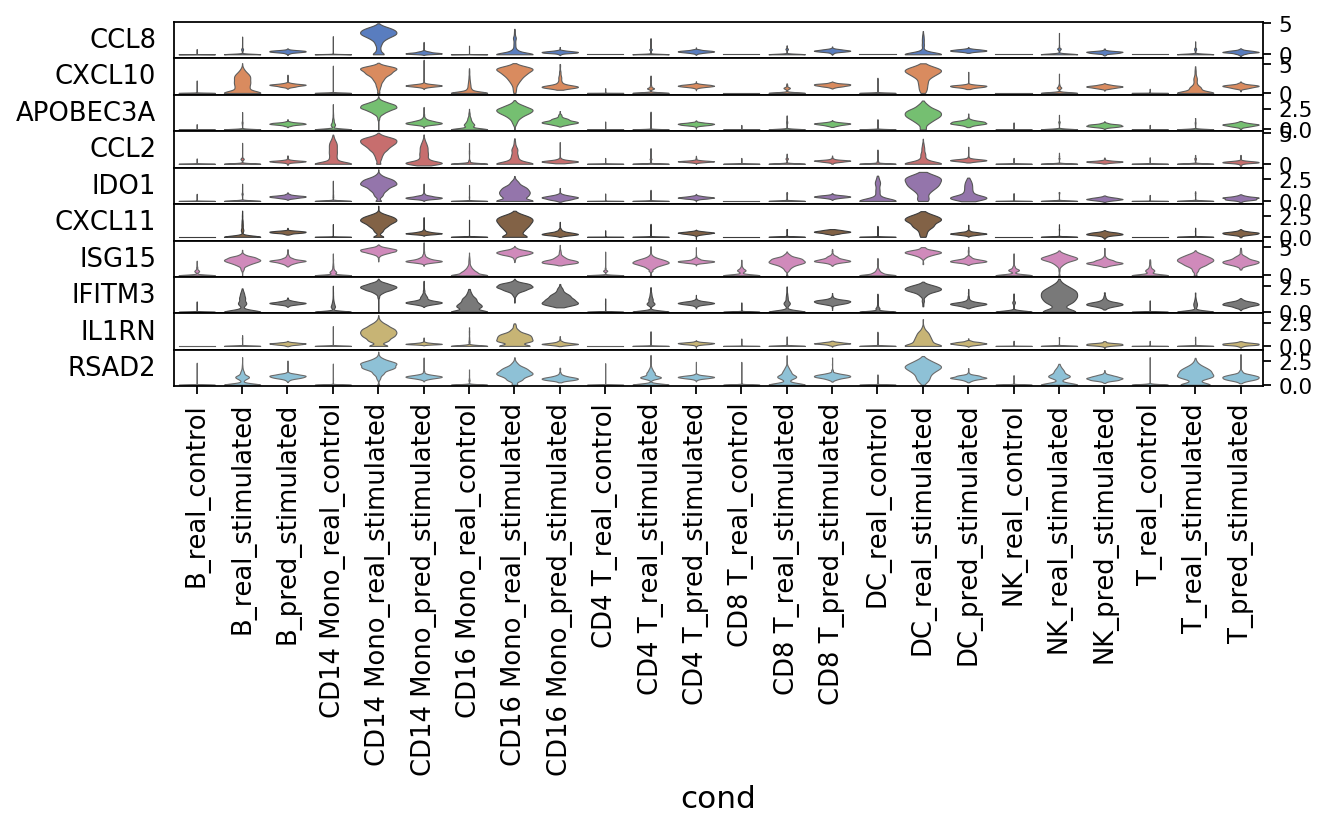

In [78]:
stacked_violin_plot(scgen_reconstructed, "scGen", "kang", "median_score")

500


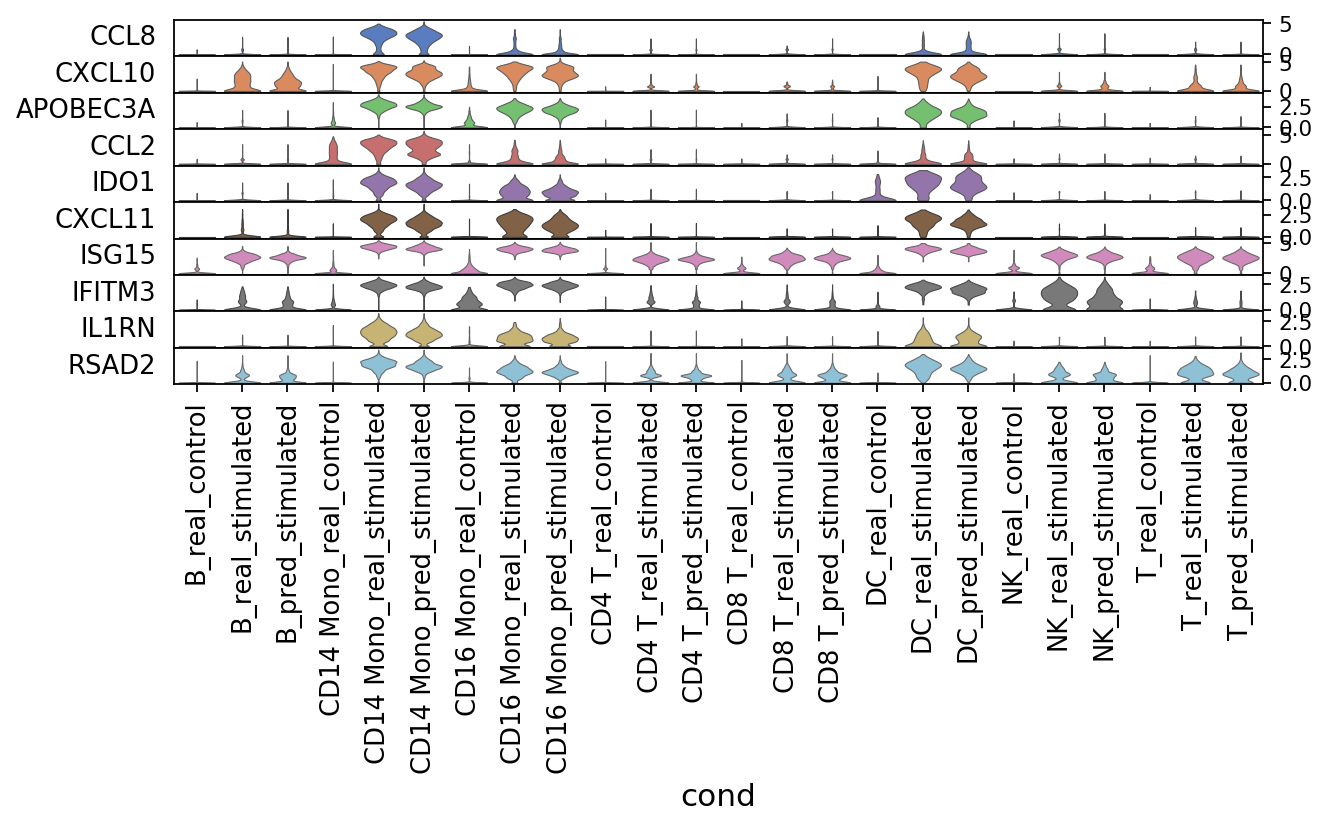

In [79]:
stacked_violin_plot(trvae_reconstructed, "trVAE", "kang", "median_score")

500


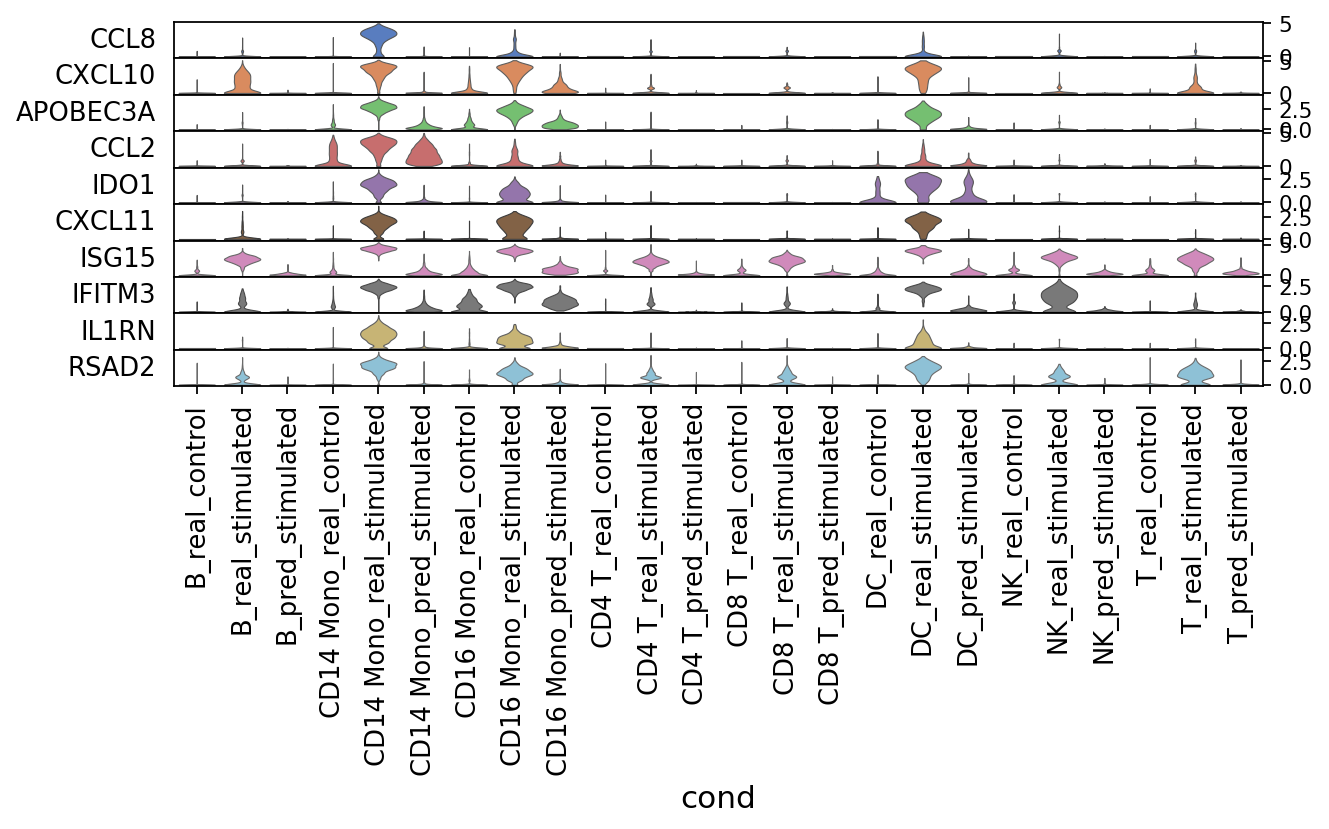

In [80]:
stacked_violin_plot(scvi_reconstructed, "scVI", "kang", "median_score")

500


... storing 'cell_type' as categorical
... storing 'cond' as categorical
... storing 'condition' as categorical
... storing 'orig.ident' as categorical
... storing 'seurat_annotations' as categorical
... storing 'stim' as categorical


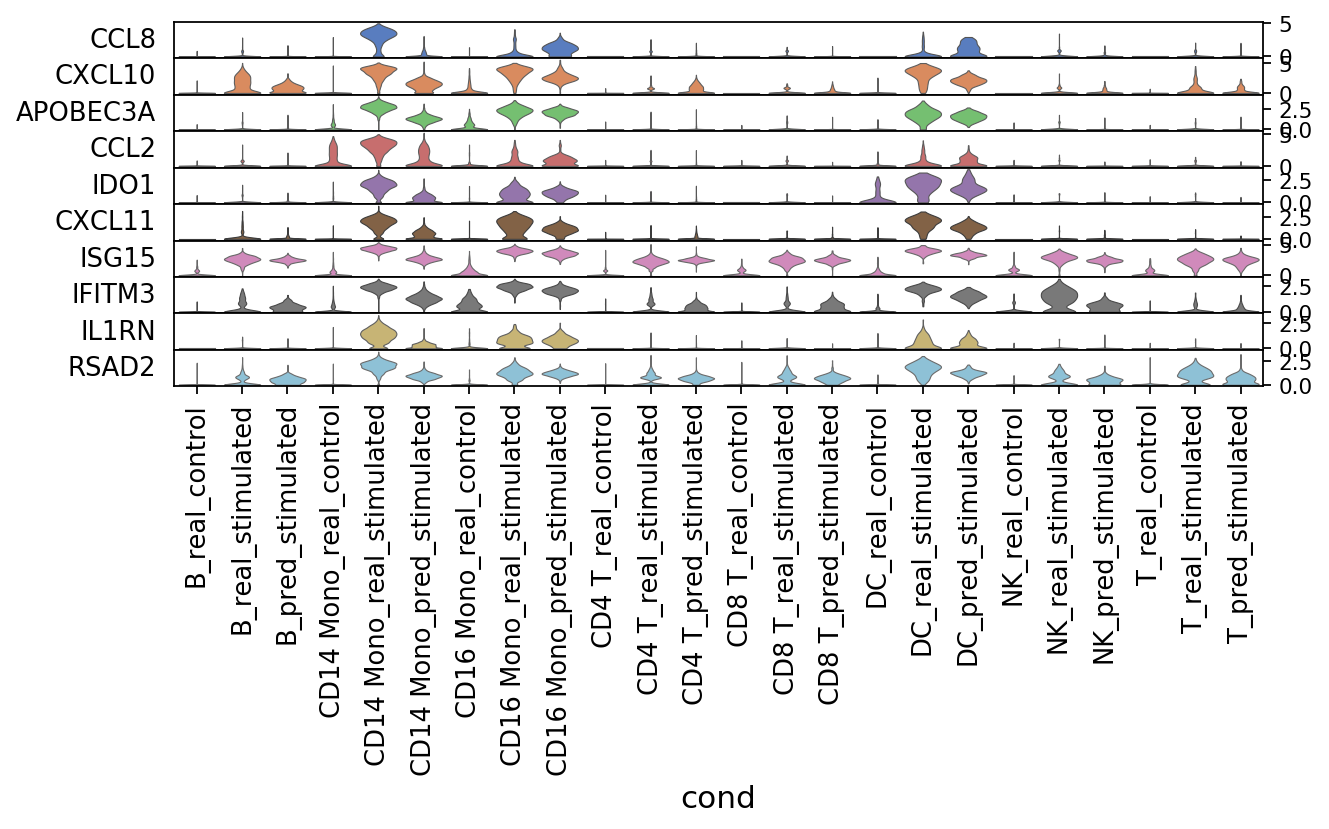

In [82]:
stacked_violin_plot(ammdcvae_reconstructed, "MMDCVAE", "kang", "median_score")

500


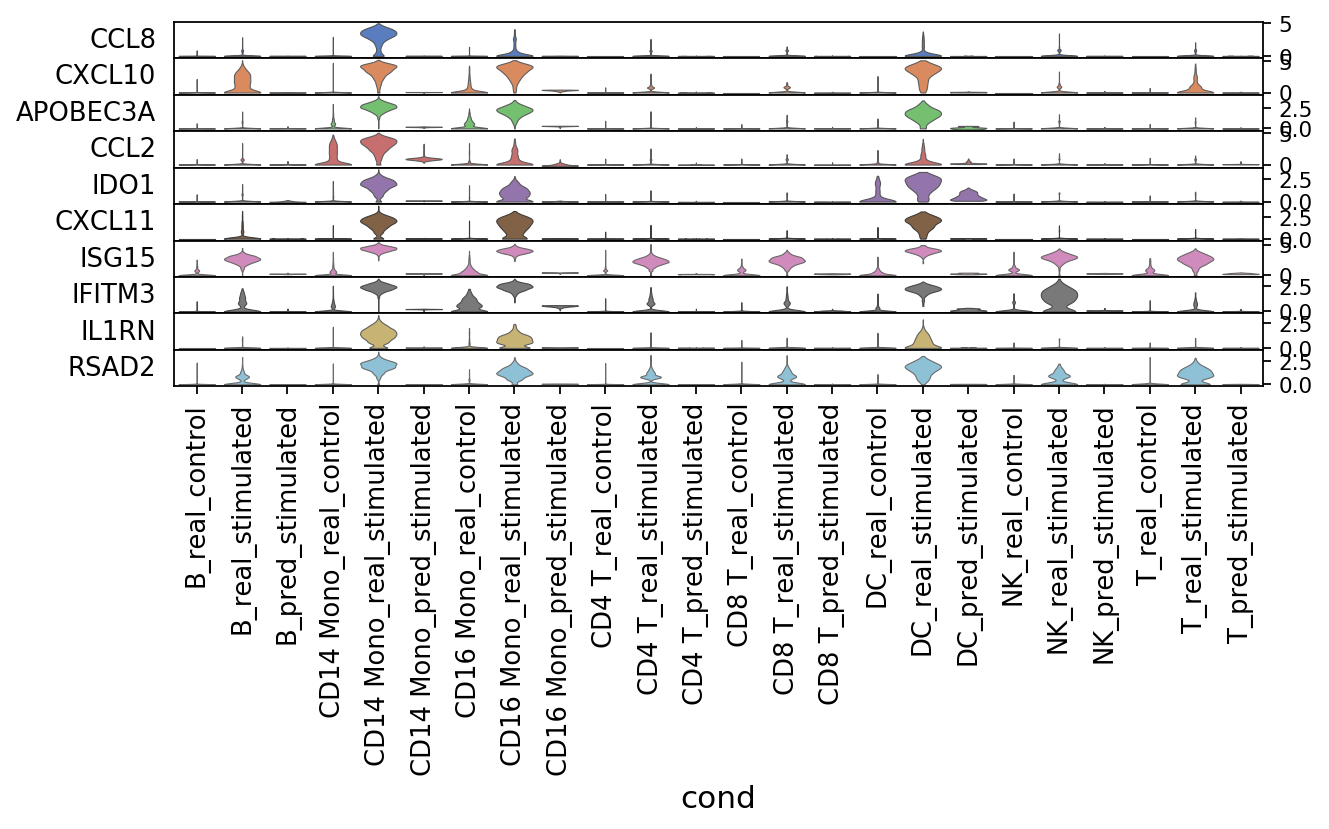

In [154]:
stacked_violin_plot(saucie_reconstructed, "SAUCIE", "kang", "median_score")

500


... storing 'cell_type' as categorical
... storing 'cond' as categorical
... storing 'condition' as categorical
... storing 'method' as categorical
... storing 'orig.ident' as categorical
... storing 'seurat_annotations' as categorical
... storing 'stim' as categorical


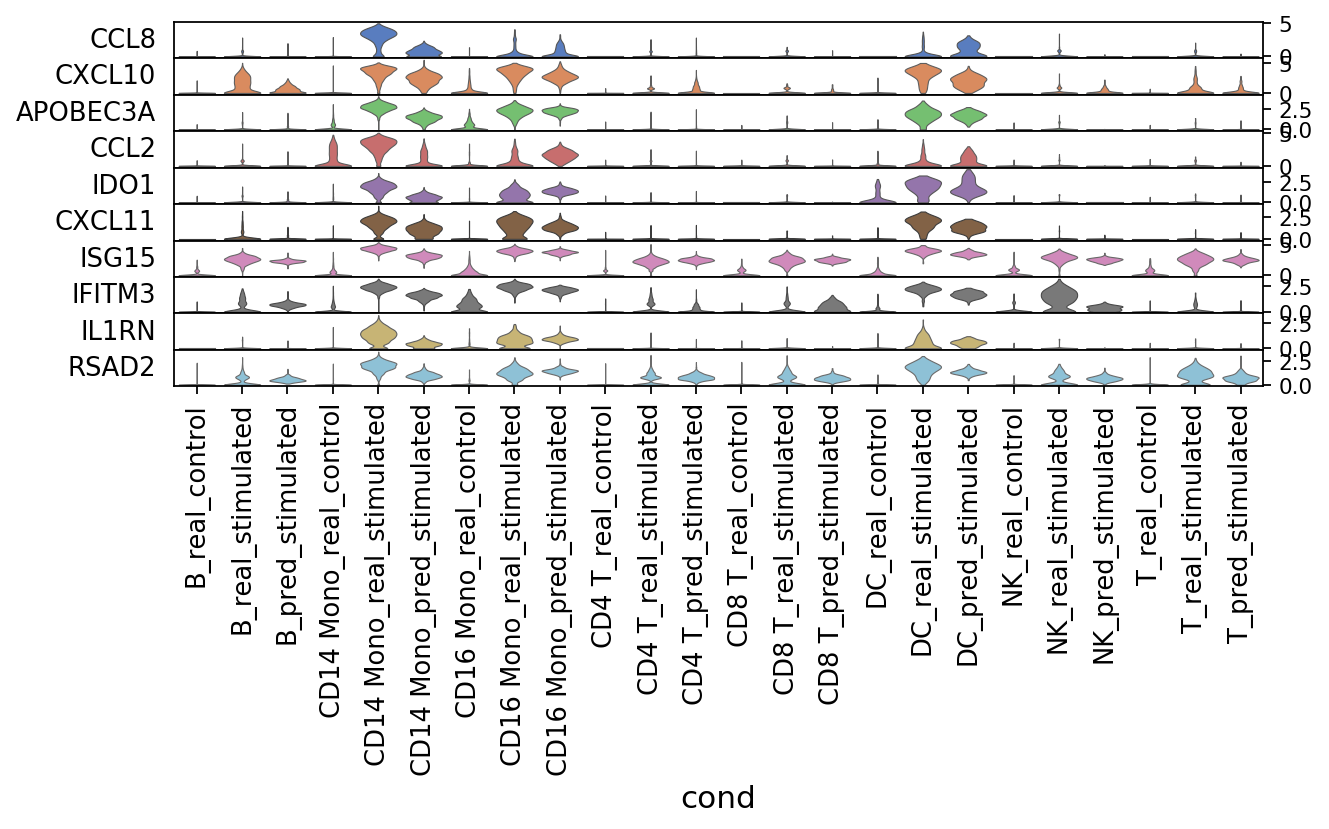

In [167]:
stacked_violin_plot(cvae_reconstructed, "CVAE", "kang", "median_score")

... storing 'cell_type' as categorical


500


... storing 'cond' as categorical
... storing 'condition' as categorical
... storing 'orig.ident' as categorical
... storing 'seurat_annotations' as categorical
... storing 'stim' as categorical


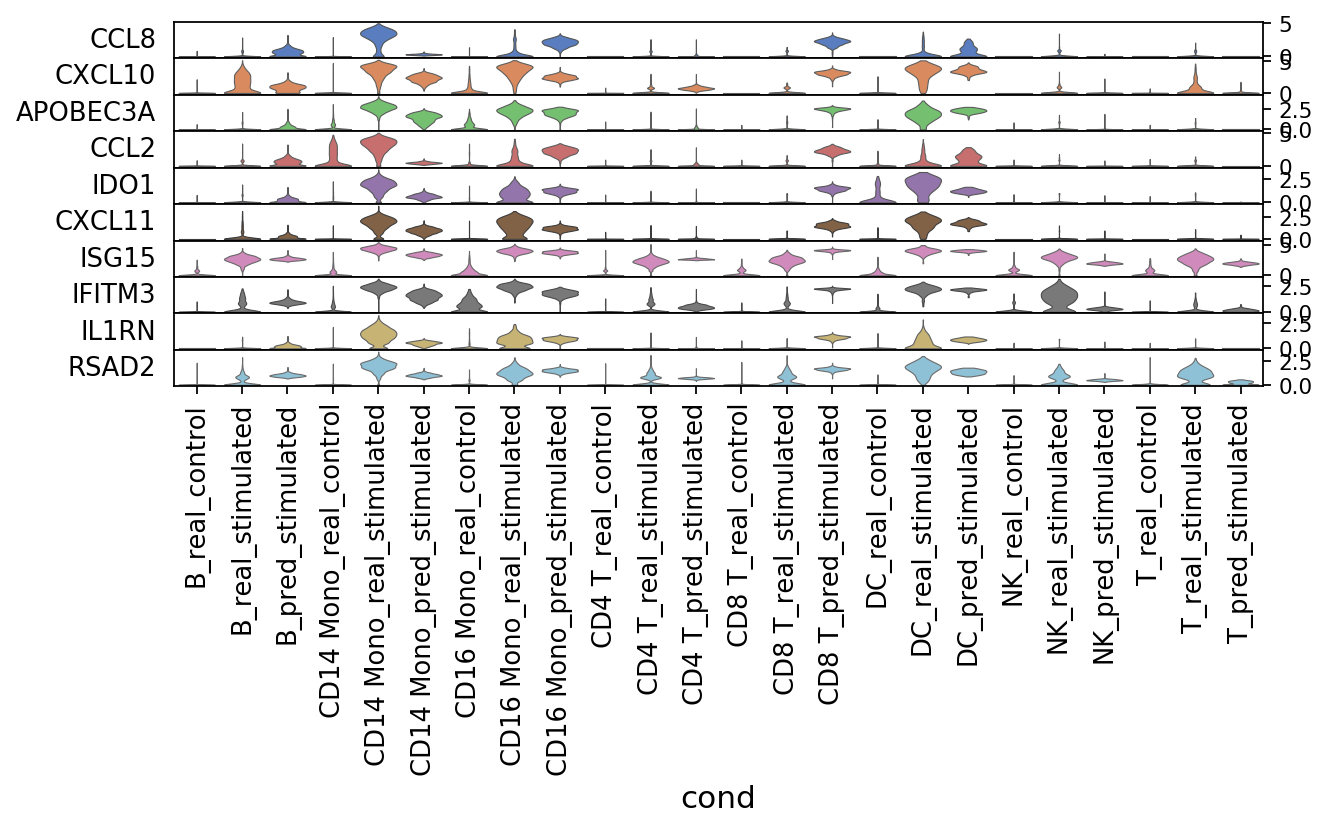

In [179]:
stacked_violin_plot(cyclegan_reconstructed, "CycleGAN", "kang", "median_score")

1000
(2000,)


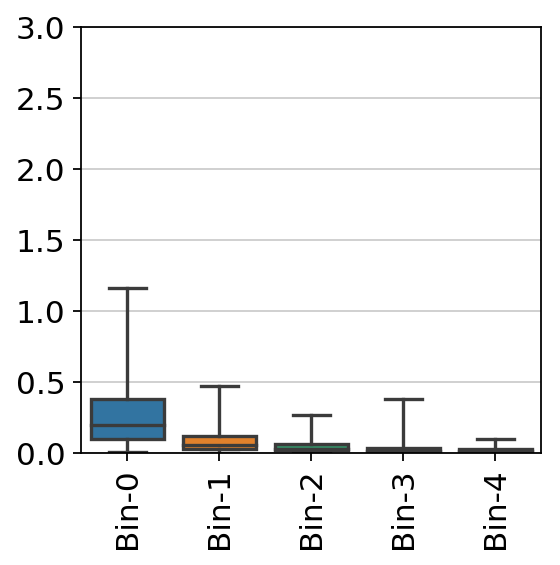

In [19]:
scgen_df = plot_boxplot(recon_data=scgen_reconstructed, 
                        method="scGen",
                        data_name="kang", 
                        n_genes=50, 
                        n_bins=5,
                        restore=False, 
                        score_type="median_score", 
                        y_measure="AE:max(x, 1)", 
                        scale="normal")

1000
(2000,)


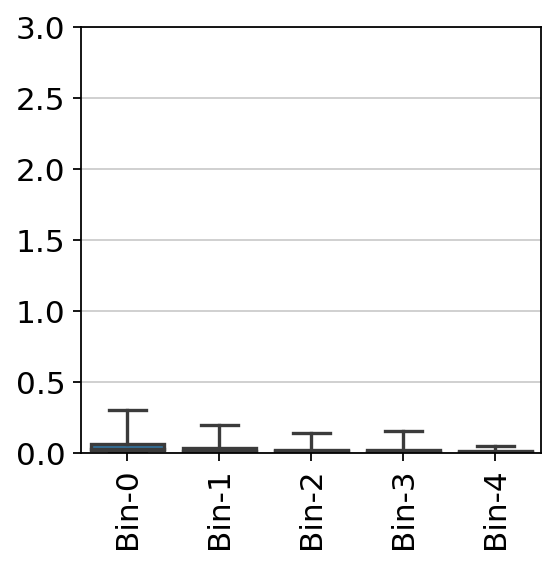

In [30]:
trvae_df = plot_boxplot(recon_data=trvae_reconstructed, 
                         method="trVAE",
                         data_name="kang", 
                         n_genes=50, 
                         n_bins=5,
                         restore=False, 
                         score_type="median_score", 
                         y_measure="AE:max(x, 1)", 
                         scale="normal")

1000
(2000,)


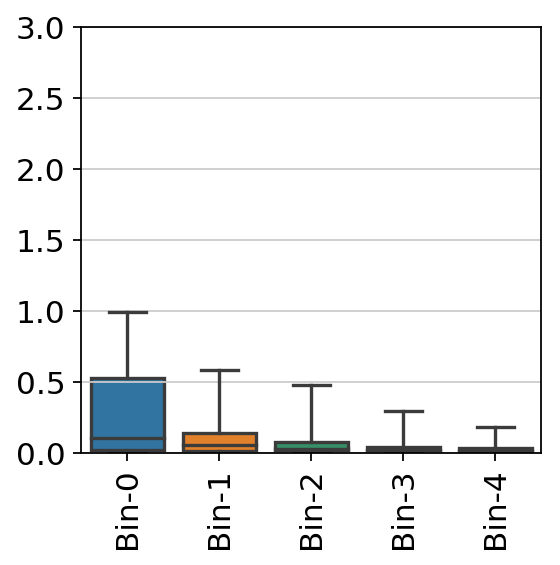

In [21]:
scvi_df = plot_boxplot(recon_data=scvi_reconstructed, 
                         method="scVI",
                         data_name="kang", 
                         n_genes=50, 
                         n_bins=5,
                         restore=False, 
                         score_type="median_score", 
                         y_measure="AE:max(x, 1)", 
                         scale="normal")

1000
(2000,)


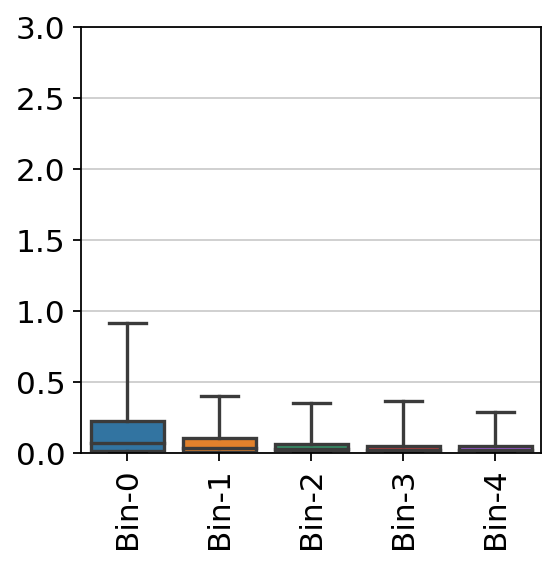

In [22]:
mmdcvae_df = plot_boxplot(recon_data=mmdcvae_reconstructed, 
                         method="MMDCVAE",
                         data_name="kang", 
                         n_genes=50, 
                         n_bins=5,
                         restore=False, 
                         score_type="median_score", 
                         y_measure="AE:max(x, 1)", 
                         scale="normal")

1000
(2000,)


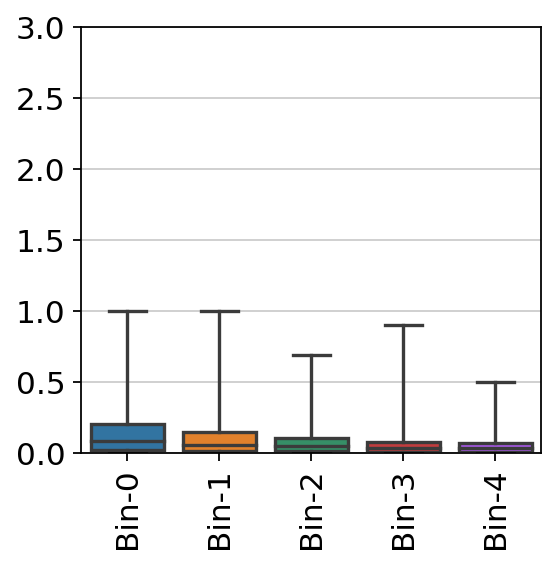

In [23]:
cvae_df = plot_boxplot(recon_data=cvae_reconstructed, 
                         method="CVAE",
                         data_name="kang", 
                         n_genes=50, 
                         n_bins=5,
                         restore=False, 
                         score_type="median_score", 
                         y_measure="AE:max(x, 1)", 
                         scale="normal")

1000
(2000,)


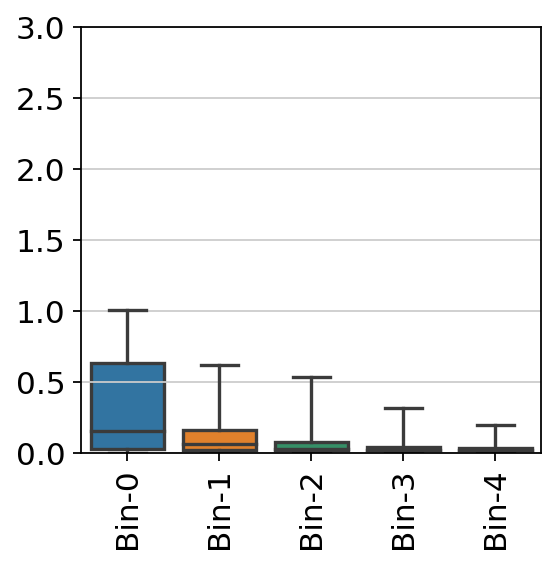

In [24]:
saucie_df = plot_boxplot(recon_data=saucie_reconstructed, 
                         method="SAUCIE",
                         data_name="kang", 
                         n_genes=50, 
                         n_bins=5,
                         restore=False, 
                         score_type="median_score", 
                         y_measure="AE:max(x, 1)", 
                         scale="normal")

1000
(2000,)


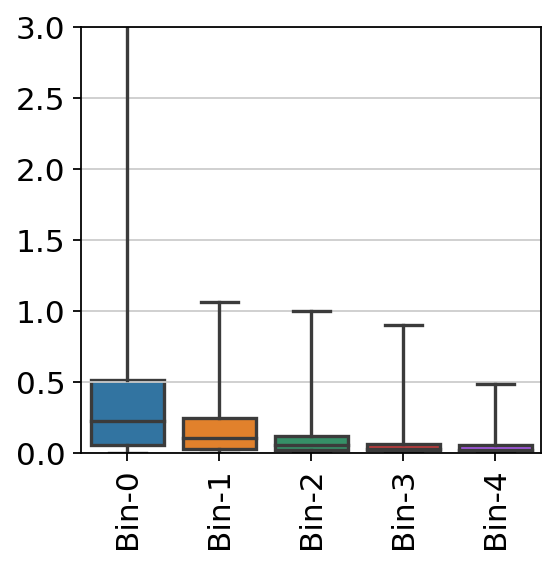

In [25]:
cyclegan_df = plot_boxplot(recon_data=cyclegan_reconstructed, 
                             method="CycleGAN",
                             data_name="kang", 
                             n_genes=50, 
                             n_bins=5,
                             restore=False, 
                             score_type="median_score", 
                             y_measure="AE:max(x, 1)", 
                             scale="normal")

In [26]:
scgen_df['method'] = 'scGen'
trvae_df['method'] = 'trVAE'
scvi_df['method'] = 'scVI'
mmdcvae_df['method'] = 'MMD-CVAE'
saucie_df['method'] = 'SAUCIE'
cvae_df['method'] = 'CVAE'
cyclegan_df['method'] = 'CycleGAN'

In [27]:
df = pd.concat([trvae_df, scgen_df, mmdcvae_df, scvi_df, cvae_df, saucie_df, cyclegan_df], axis=0)
df.head()

,scores,conditions,method
0,0.090043,Bin-1,trVAE
1,0.106974,Bin-1,trVAE
2,0.044555,Bin-1,trVAE
3,0.082532,Bin-1,trVAE
4,0.100985,Bin-1,trVAE


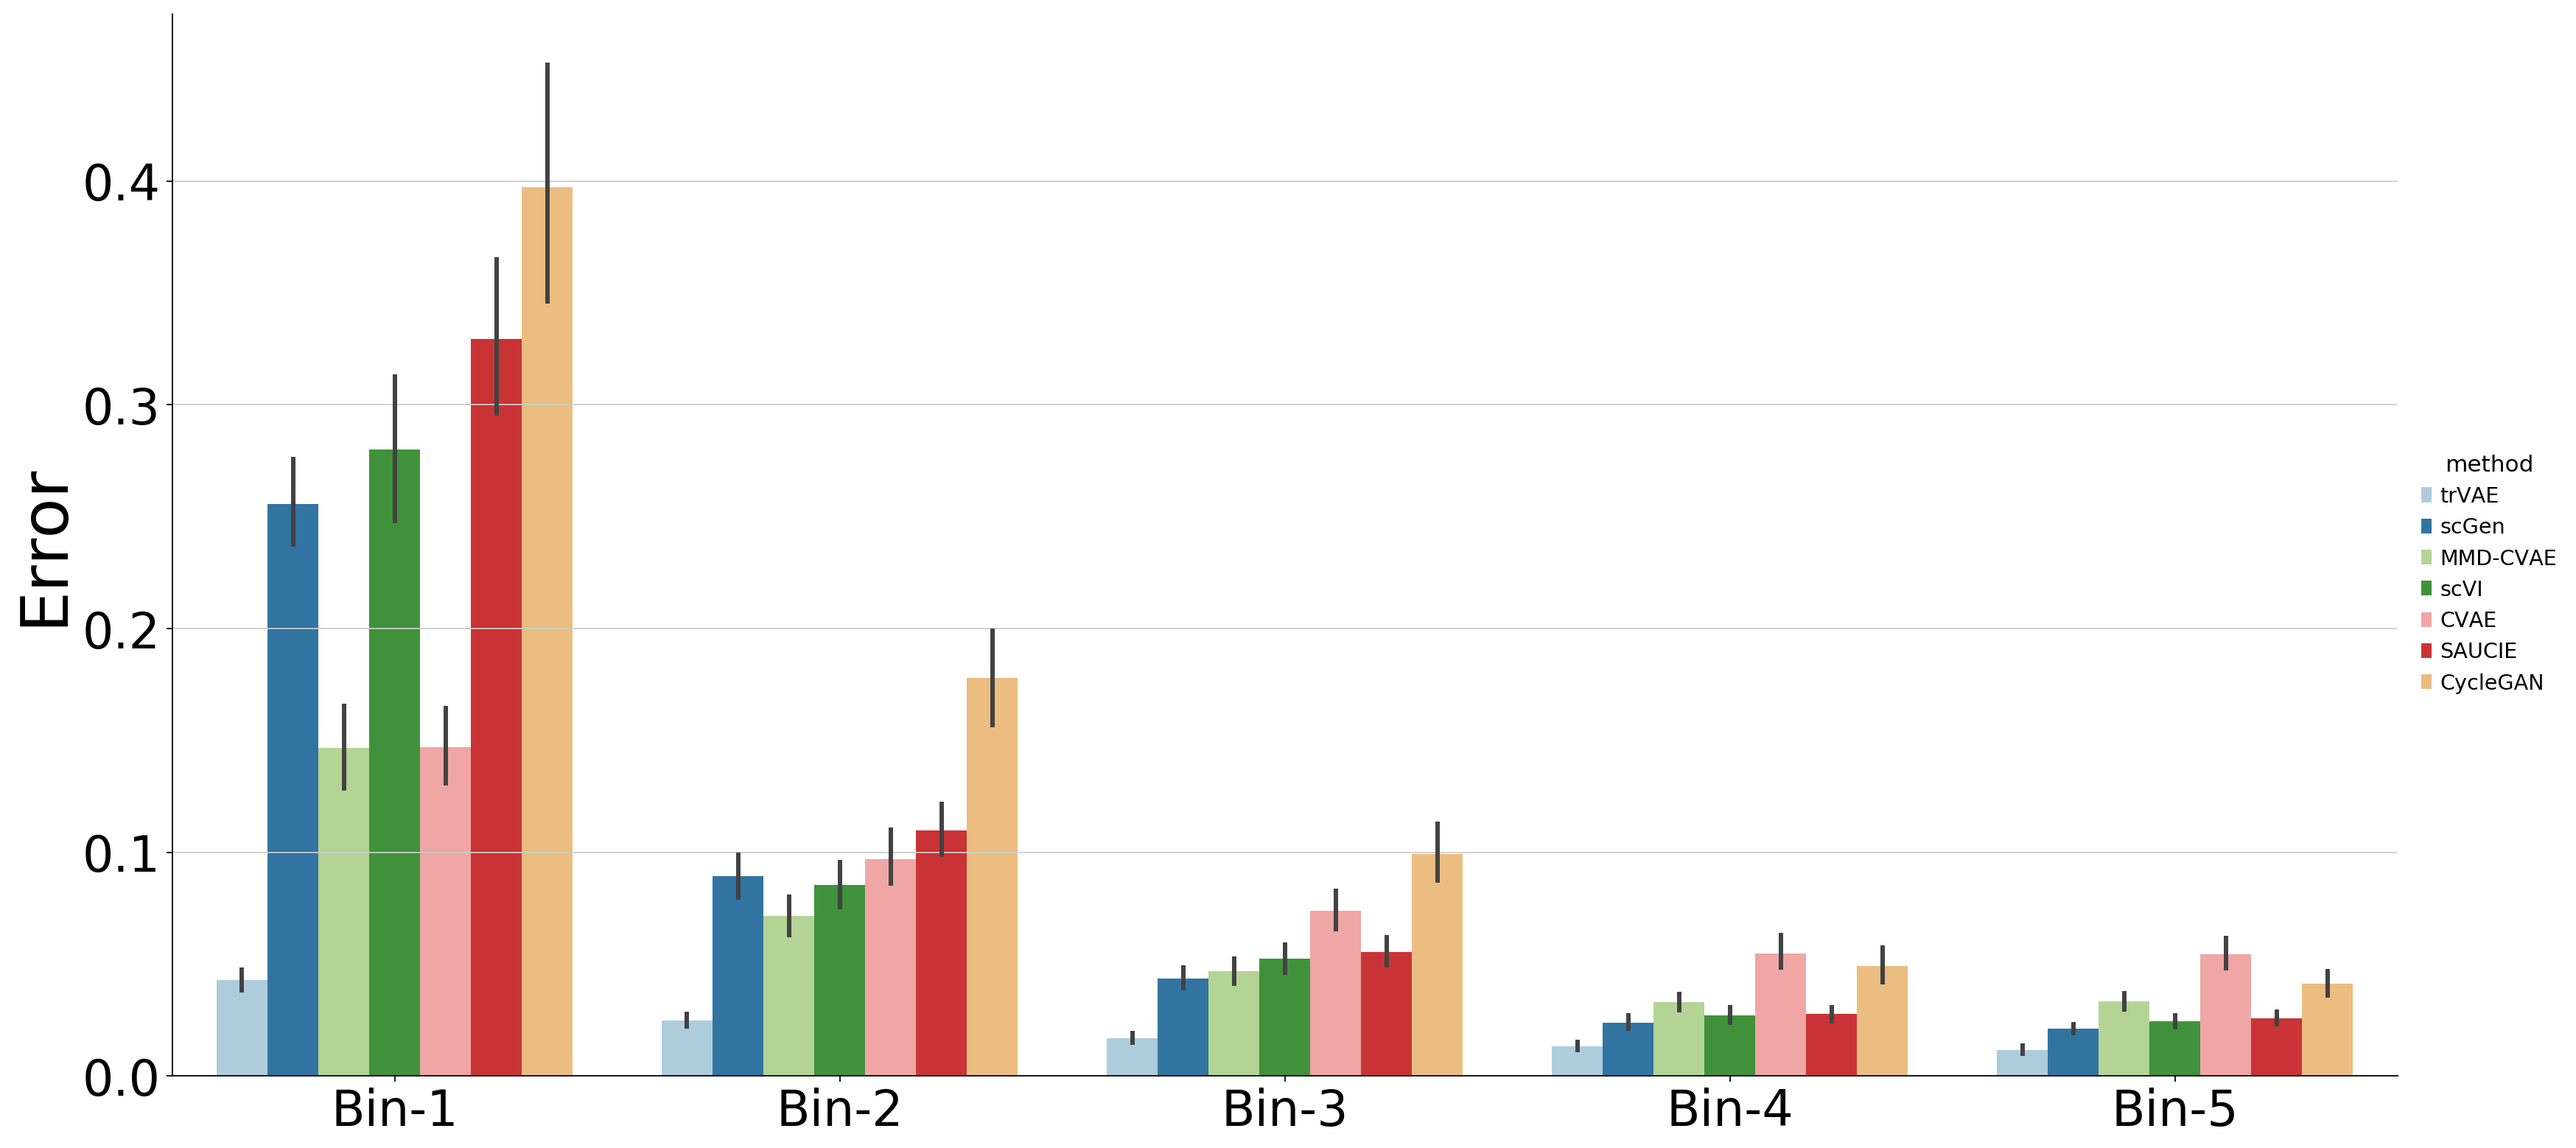

In [31]:
sns.catplot(x='conditions', y='scores', hue='method', kind='bar', data=df, 
            height=10, aspect=2, palette=sns.color_palette('Paired', 7), legend=True)
plt.xlabel("")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel("Error", fontsize=40)
plt.savefig("./results/New_Figure/GroupedBarplot_model_comparison_kang.pdf", dpi=300)